## [1. Productivity Prediction of Garment Employees Data Set](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees)



**Data Set Information:**

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

**Attribute Information:**

01. date : Date in MM-DD-YYYY

02. day : Day of the Week

03. quarter : A portion of the month. A month was divided into four quarters

04. department : Associated department with the instance

05. team_no : Associated team number with the instance

06. no_of_workers : Number of workers in each team

07. no_of_style_change : Number of changes in the style of a particular product

08. targeted_productivity : Targeted productivity set by the Authority for each team for each day.

09. smv : Standard Minute Value, it is the allocated time for a task

10. wip : Work in progress. Includes the number of unfinished items for products

11. over_time : Represents the amount of overtime by each team in minutes

12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13. idle_time : The amount of time when the production was interrupted due to several reasons

14. idle_men : The number of workers who were idle due to production interruption

15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

#### Classifiaction Based

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

In [348]:
df= pd.read_csv('https://raw.githubusercontent.com/shivshaktisahoo/test/main/garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [349]:
print(df.info())        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

From above info, we can notice wip has null values and there is 5 object type which need to take care 

In [350]:
df.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

**/////////////////    Preprocessing     /////////////////**

In [351]:
df['wip'] = df['wip'].fillna(0)

# department has duplicates values : ['sweing', 'finishing ', 'finishing'] ===> ['sweing', 'finishing']
for i in range(len(df)):     
  df['department'][i] = df['department'][i].strip()

# Mapping Non-Numeric to Numeric
df['department'] = df['department'].map({'sweing':1, 'finishing':0})
df['quarter'] = df['quarter'].map({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})
df['day'] = df['day'].map({'Saturday':1, 'Sunday':2, 'Monday':3, 'Tuesday':4, 'Wednesday':5,'Thursday':6})

# Dropping date column
df = df.drop('date',axis=1)  

var1 = df['actual_productivity']
for i in enumerate(var1):
  if var1[i[0]]>0 and var1[i[0]]<=0.65:
    var1[i[0]] = 0
  else:
    var1[i[0]] = 1

In [352]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,6,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1.0
1,1,0,6,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,1.0
2,1,1,6,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1.0
3,1,1,6,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1.0
4,1,1,6,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1.0


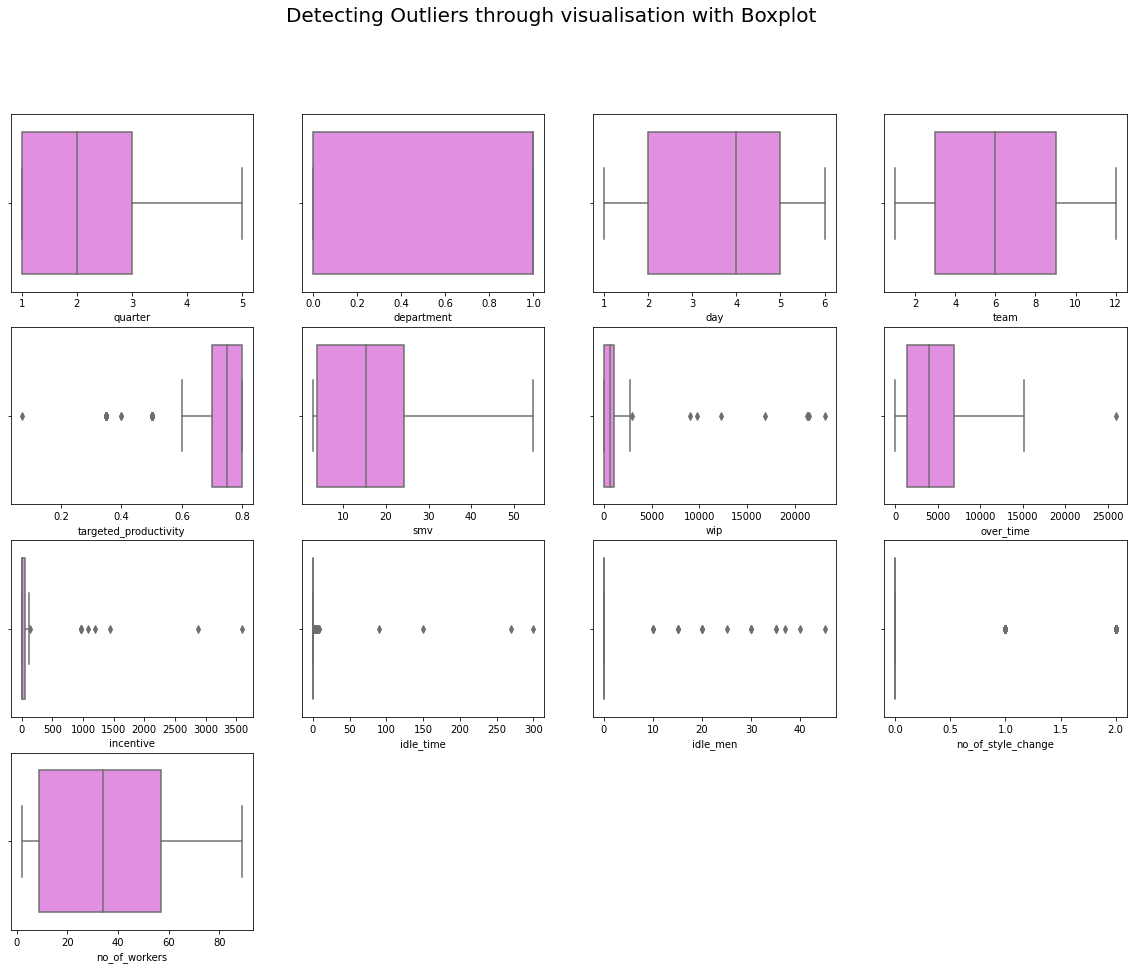

In [353]:
plt.figure(figsize=(20,15))
for i,j in zip(range(1,14),df.columns):
  plt.subplot(4,4,i)
  sns.boxplot(x=df[j], color="violet")
plt.suptitle("Detecting Outliers through visualisation with Boxplot",size=20);

In [354]:
# Removing Outliers using Quantile method :
MIN_PERCENTILE_THRES = 0.05
MAX_PERCENTILE_THRES = 0.95
for i in df.columns: 
  min_thres = df[i].quantile(MIN_PERCENTILE_THRES)
  max_thres = df[i].quantile(MAX_PERCENTILE_THRES)
  print(f"{i} :                     minimum is {min_thres} and maximum is {max_thres}")

quarter :                     minimum is 1.0 and maximum is 4.0
department :                     minimum is 0.0 and maximum is 1.0
day :                     minimum is 1.0 and maximum is 6.0
team :                     minimum is 1.0 and maximum is 12.0
targeted_productivity :                     minimum is 0.5 and maximum is 0.8
smv :                     minimum is 2.9 and maximum is 30.1
wip :                     minimum is 0.0 and maximum is 1502.8000000000002
over_time :                     minimum is 960.0 and maximum is 10368.000000000004
incentive :                     minimum is 0.0 and maximum is 88.0
idle_time :                     minimum is 0.0 and maximum is 0.0
idle_men :                     minimum is 0.0 and maximum is 0.0
no_of_style_change :                     minimum is 0.0 and maximum is 1.0
no_of_workers :                     minimum is 8.0 and maximum is 59.0
actual_productivity :                     minimum is 0.0 and maximum is 1.0


In [355]:
def quant(g1,attr):
  min_thres = g1[attr].quantile(MIN_PERCENTILE_THRES)
  max_thres = g1[attr].quantile(MAX_PERCENTILE_THRES)
  g1 = g1[(g1[attr]<max_thres) & (g1[attr]>min_thres)]
  return g1

g1 = df.copy()
# removing outliers for those which are required
g1 = quant(g1,'no_of_workers')
g1 = quant(g1,'over_time')

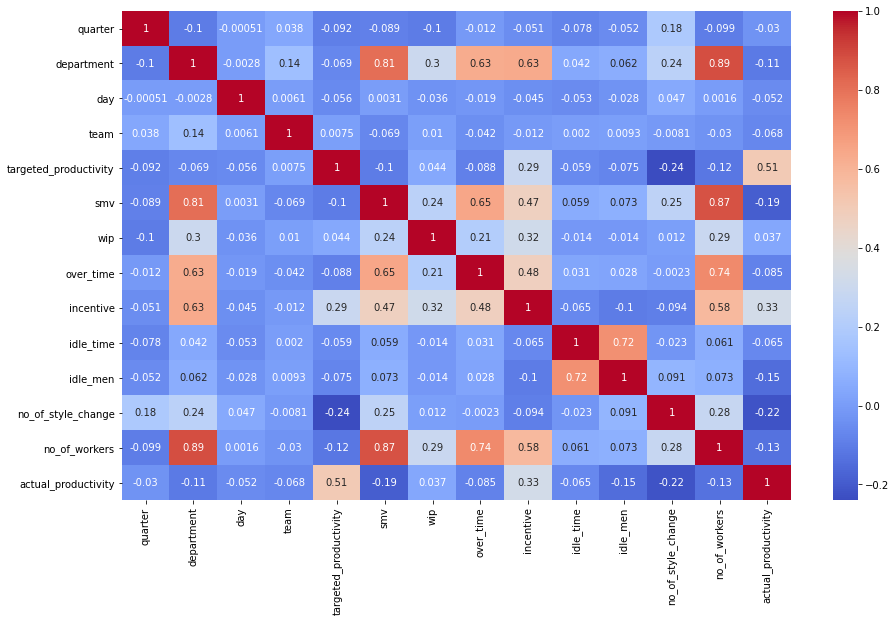

In [356]:
garments_corr = g1.corr()
plt.figure(figsize=(15,9))
sns.heatmap(garments_corr,annot=True,cmap="coolwarm");

In [357]:
# relationship between attribute and targeted column with minimum threshold
MIN_THRES = 0.05
garments_final_attr = []
for i in garments_corr.drop(['actual_productivity'],axis=1):
  if abs(garments_corr[i]['actual_productivity']) <= MIN_THRES:
      garments_final_attr.append(i)
print(f"Removing attribute which has less relation with target value: {garments_final_attr}")
g1 = g1.drop(garments_final_attr,axis=1)

# relationship between attribute and attribute with maximum threshold
MAX_THRES = 0.85
list1 = list(garments_corr.columns)
max_final_attr = []
for i in enumerate(list1):
  for j in list1[i[0]+1:]:
    if abs(garments_corr[i[1]][j]) >= MAX_THRES:
      max_final_attr.append(i[1])
print(f"Removing attribute which has equivalent relation with other attributes : {max_final_attr}")
g1 = g1.drop(max_final_attr,axis=1)

Removing attribute which has less relation with target value: ['quarter', 'wip']
Removing attribute which has equivalent relation with other attributes : ['department', 'smv']


In [358]:
g1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 2 to 1195
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    729 non-null    int64  
 1   team                   729 non-null    int64  
 2   targeted_productivity  729 non-null    float64
 3   over_time              729 non-null    int64  
 4   incentive              729 non-null    int64  
 5   idle_time              729 non-null    float64
 6   idle_men               729 non-null    int64  
 7   no_of_style_change     729 non-null    int64  
 8   no_of_workers          729 non-null    float64
 9   actual_productivity    729 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 62.6 KB


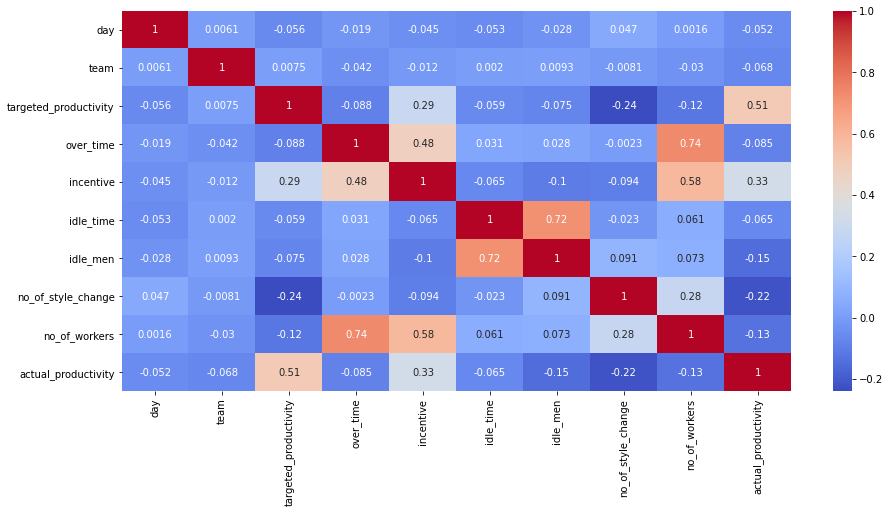

In [359]:
plt.figure(figsize=(15,7))
sns.heatmap(g1.corr(),annot=True,cmap="coolwarm");

**Steps after preprocessing for training our model**

In [360]:
X = g1.drop(['actual_productivity'], axis=1)
y = g1['actual_productivity']

#Shuffling and Splitting the dataset into into differnet tarining and testing variables  
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.15)

**For Classifying :**

**1. Logistic Regression**

**2. Decision Tree Classifier**

**3. K-Nearest Neighbor(KNN)**

**4. Naive Bayes**

**5. Random Forest Classifier**

**6. Support Vector Machine(SVM)** 

In [361]:
# This function is used for all model's evaluation 
def evaluate_print(obj,x_test,y_test):
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
  pred = obj.predict(x_test)
  print(f"Recall Score : {recall_score(y_test, pred)}")
  print(f"Precision Score : {precision_score(y_test, pred)}")
  print(f"Accuracy score is {accuracy_score(y_test, pred)}")
  print(f"F1 score is {f1_score(y_test, pred)}")
   

**1. Training on LOGISTIC REGRESSION Algorithm :**

In [362]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)
pred1 = reg.predict(x_test)
reg.score(x_test,y_test)

0.8909090909090909

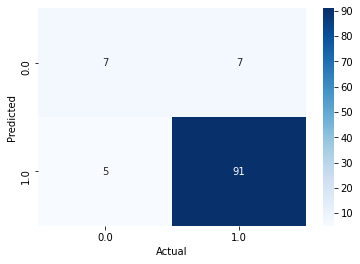

In [363]:
from sklearn.metrics import confusion_matrix
matx = confusion_matrix(y_test, pred1)
matx = pd.DataFrame(matx,index=np.unique(y), columns=np.unique(y))
matx.index.name = "Predicted"
matx.columns.name = "Actual"
sns.heatmap(data=matx,annot=True,cmap="Blues");

In [364]:
print("Evaluation on Logistic Regression Algorithm:\n\n")
evaluate_print(reg,x_test,y_test)

Evaluation on Logistic Regression Algorithm:


Recall Score : 0.9479166666666666
Precision Score : 0.9285714285714286
Accuracy score is 0.8909090909090909
F1 score is 0.9381443298969072


**2. Training on DECISION TREE CLASSIFIER Algorithm :**

In [365]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(x_train,y_train)
pred2 = dt_clf.predict(x_test)
dt_clf.score(x_test,y_test)

0.8636363636363636

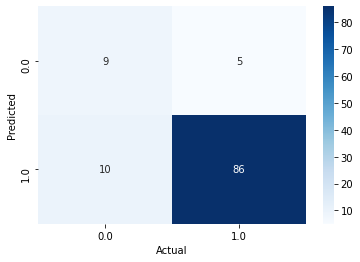

In [366]:
from sklearn.metrics import confusion_matrix
matx2 = confusion_matrix(y_test, pred2)
matx2 = pd.DataFrame(matx2,index=np.unique(y), columns=np.unique(y))
matx2.index.name = "Predicted"
matx2.columns.name = "Actual"
sns.heatmap(data=matx2,annot=True,cmap="Blues");

In [367]:
print("Evaluation on Decision Tree Classifier Algorithm:\n\n")
evaluate_print(dt_clf,x_test,y_test)

Evaluation on Decision Tree Classifier Algorithm:


Recall Score : 0.8958333333333334
Precision Score : 0.945054945054945
Accuracy score is 0.8636363636363636
F1 score is 0.9197860962566845


**3. Training on KNN Algorithm :**

In [368]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(x_train,y_train)
pred3 = neigh.predict(x_test)
neigh.score(x_test,y_test)

0.8818181818181818

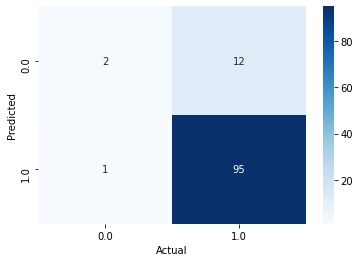

In [369]:
from sklearn.metrics import confusion_matrix
matx3 = confusion_matrix(y_test, pred3)
matx3 = pd.DataFrame(matx3,index=np.unique(y), columns=np.unique(y))
matx3.index.name = "Predicted"
matx3.columns.name = "Actual"
sns.heatmap(data=matx3,annot=True,cmap="Blues");

In [370]:
print("Evaluation on KNN Algorithm:\n\n")
evaluate_print(neigh,x_test,y_test)

Evaluation on KNN Algorithm:


Recall Score : 0.9895833333333334
Precision Score : 0.8878504672897196
Accuracy score is 0.8818181818181818
F1 score is 0.9359605911330049


**4. Training on NAIVE BAYES Algorithm :**

In [371]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred4 = gnb.predict(x_test)
gnb.score(x_test,y_test)

0.8727272727272727

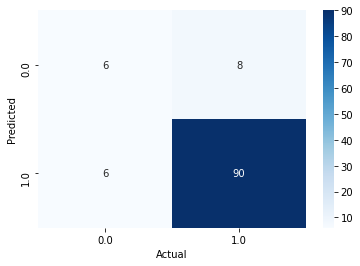

In [372]:
from sklearn.metrics import confusion_matrix
matx4 = confusion_matrix(y_test, pred4)
matx4 = pd.DataFrame(matx4,index=np.unique(y), columns=np.unique(y))
matx4.index.name = "Predicted"
matx4.columns.name = "Actual"
sns.heatmap(data=matx4,annot=True,cmap="Blues");

In [373]:
print("Evaluation on NAIVE BAYES Algorithm:\n\n")
evaluate_print(gnb,x_test,y_test)

Evaluation on NAIVE BAYES Algorithm:


Recall Score : 0.9375
Precision Score : 0.9183673469387755
Accuracy score is 0.8727272727272727
F1 score is 0.9278350515463918


**5. Training on Random Forest Classifier Algorithm**

In [374]:
from sklearn.ensemble import RandomForestClassifier
rt_clf = RandomForestClassifier()
rt_clf.fit(x_train,y_train)
pred5 = rt_clf.predict(x_test)
rt_clf.score(x_test,y_test)

0.9272727272727272

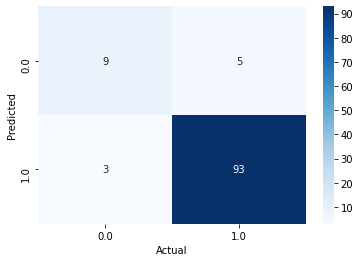

In [375]:
from sklearn.metrics import confusion_matrix
matx5 = confusion_matrix(y_test, pred5)
matx5 = pd.DataFrame(matx5,index=np.unique(y), columns=np.unique(y))
matx5.index.name = "Predicted"
matx5.columns.name = "Actual"
sns.heatmap(data=matx5,annot=True,cmap="Blues");

In [376]:
print("Evaluation on Random Forest Classifier Algorithm:\n\n")
evaluate_print(rt_clf,x_test,y_test)

Evaluation on Random Forest Classifier Algorithm:


Recall Score : 0.96875
Precision Score : 0.9489795918367347
Accuracy score is 0.9272727272727272
F1 score is 0.9587628865979382


**6. Training on Support Vector Machine(SVM) Algorithm**

In [377]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)
pred6 = svm_clf.predict(x_test)
svm_clf.score(x_test,y_test)


0.8727272727272727

Text(0.5, 1.0, 'Support Vector Machine(SVM)')

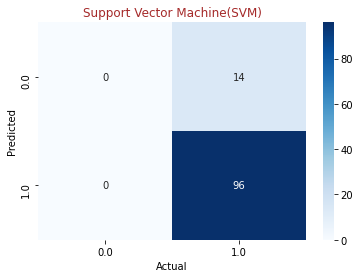

In [378]:
from sklearn.metrics import confusion_matrix
matx6 = confusion_matrix(y_test, pred6)
matx6 = pd.DataFrame(matx6,index=np.unique(y), columns=np.unique(y))
matx6.index.name = "Predicted"
matx6.columns.name = "Actual"
p= sns.heatmap(data=matx6,annot=True,cmap="Blues");
p.set_title("Support Vector Machine(SVM)", color="brown")

In [379]:
print("Evaluation on Support Vector Machine(SVM)  Algorithm:\n\n")
evaluate_print(svm_clf,x_test,y_test)

Evaluation on Support Vector Machine(SVM)  Algorithm:


Recall Score : 1.0
Precision Score : 0.8727272727272727
Accuracy score is 0.8727272727272727
F1 score is 0.9320388349514563


In [380]:
# creating a dataframe for evaluation and visualisation purpose
df_modelevaluation = pd.DataFrame(columns=['Model_name','Training_score','Testing_Score', 'Recall', 'Precision', 'Accuracy', 'F1_score'])

def getmodel(i,model):
  global df_modelevaluation
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
  obj = model.fit(x_train, y_train)
  pred = model.predict(x_test)

  modelname = type(obj).__name__    # get Models Name using type
  df_modelevaluation.loc[i] = [modelname, model.score(x_train, y_train), model.score(x_test, y_test),
        recall_score(y_test, pred), precision_score(y_test, pred),
        accuracy_score(y_test, pred), f1_score(y_test, pred)]

model_list = [LogisticRegression(random_state=0), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=30), GaussianNB(), RandomForestClassifier(), SVC()]  
for i,j in enumerate(model_list):
  getmodel(i,j)


In [381]:
df_modelevaluation

,Model_name,Training_score,Testing_Score,Recall,Precision,Accuracy,F1_score
0,LogisticRegression,0.844911,0.890909,0.947917,0.928571,0.890909,0.938144
1,DecisionTreeClassifier,0.998384,0.900000,0.927083,0.956989,0.900000,0.941799
2,KNeighborsClassifier,0.809370,0.881818,0.989583,0.887850,0.881818,0.935961
3,GaussianNB,0.835218,0.872727,0.937500,0.918367,0.872727,0.927835
4,RandomForestClassifier,0.998384,0.927273,0.968750,0.948980,0.927273,0.958763
5,SVC,0.785137,0.872727,1.000000,0.872727,0.872727,0.932039


Text(0.5, 1.0, 'Comparison Chart for Models:')

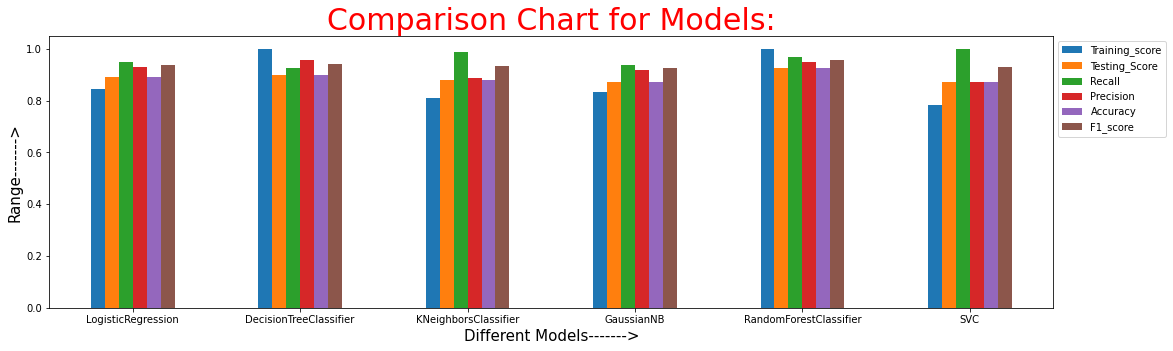

In [382]:
df1 = df_modelevaluation.copy()
df1 = df1.drop(['Model_name'],axis=1)
df1.rename(df_modelevaluation.Model_name).plot(kind="bar",figsize=(18,5))
plt.xticks(rotation="horizontal")
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Different Models------->",fontsize=15)
plt.ylabel("Range------->",fontsize=15)
plt.title("Comparison Chart for Models:",fontsize=30,color="Red")

In [383]:
print(f"From Above:\nRandom Forest Classifier Model has better stats:\nPrecision = {(df_modelevaluation.loc[4,'Precision'])*100:.2f} %\nAccuracy = {(df_modelevaluation.loc[4,'Accuracy'])*100:.2f} %\nF1_score = {(df_modelevaluation.loc[4,'F1_score'])*100:.2f} %")


From Above:
Random Forest Classifier Model has better stats:
Precision = 94.90 %
Accuracy = 92.73 %
F1_score = 95.88 %


**Conclusion Statement :**

From above observation on df_modelevaluation Dataframe, we can select **Random Forest Classifier Model** as our final model due to best overall standing over other models for Garments Employee Dataset.